# Artificial Neural Network

An ANN is a Machine Learning model inspired by the networks of biological neurons found in our brains. <br>
ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks, such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go by examining millions of past games and then playing against itself (DeepMind’s AlphaGo).

Architecture of a biological neuron: <br>

Composed of a cell body containing the nucleus and most of the cell’s complex components, and many branching extensions called dendrites, plus one very long extension called the axon. <br>
Near its extremity the axon splits off into many branches called telodendria, and at the tip of these branches are minuscule structures called synaptic terminals (or simply synapses), which are connected to the dendrites (or directly to the cell body) of other neurons.


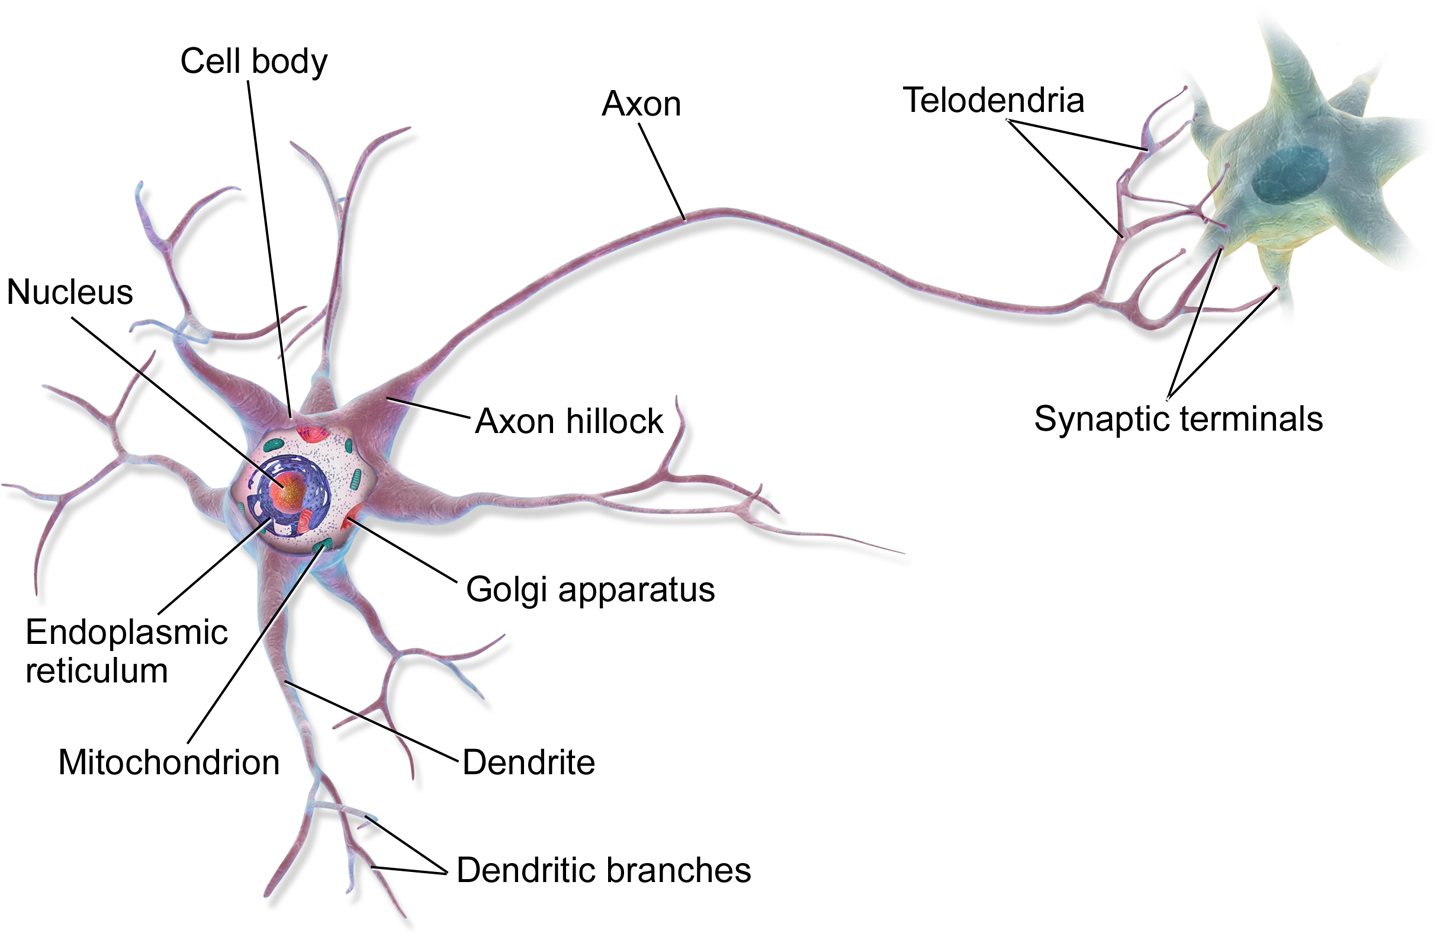

Biological neurons receive short electrical impulses called signals from other neurons via these synapses. When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it fires its own signals.

Multiple layers in a biological neural network:

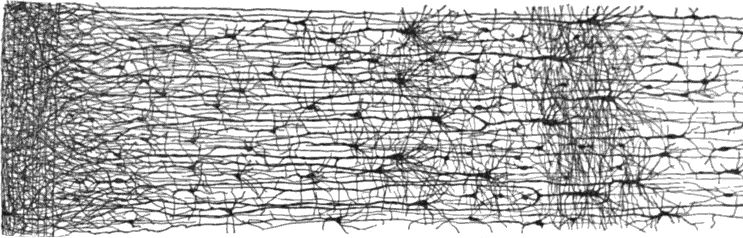

# Logical computations with neurans:

Find out when the output is activated in the following simple ANNs. (assume that a neuran is activated when at least two of its inputs are active).

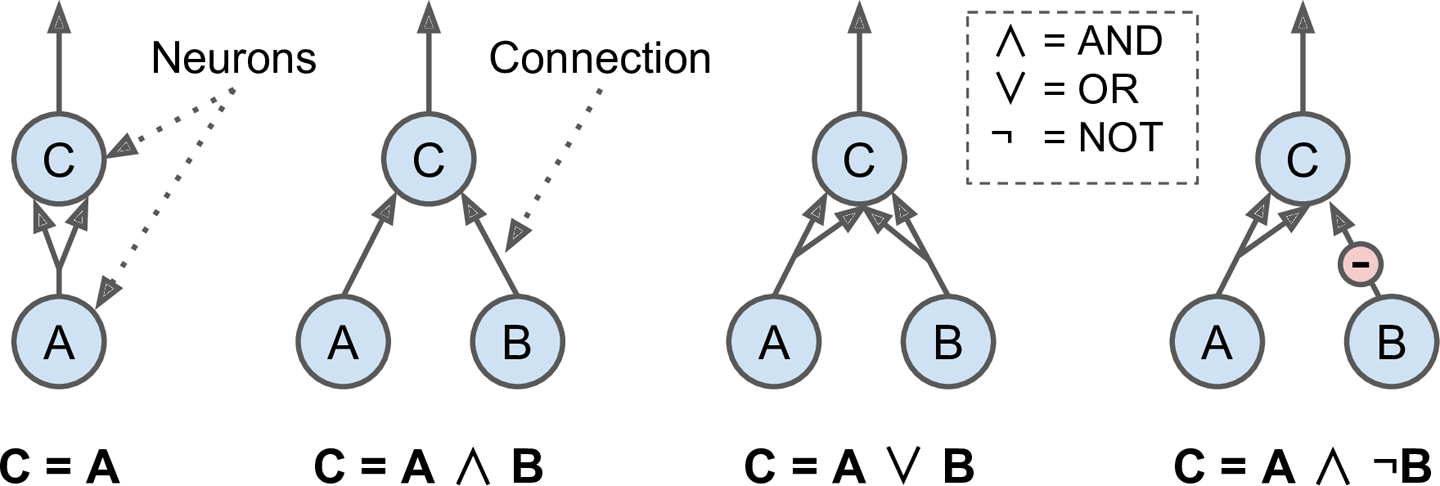



*   The first network on the left is simply the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A), but if neuron A is off, then neuron C is off as well.

*   The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).
*   The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).


*   Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and if neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.



# The perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron  called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs (z = w1 x1 + w2 x2 + ⋯ + wn xn = wT x), then applies a step function to that sum and outputs the result: hw(x) = step (z) = step (wT x).

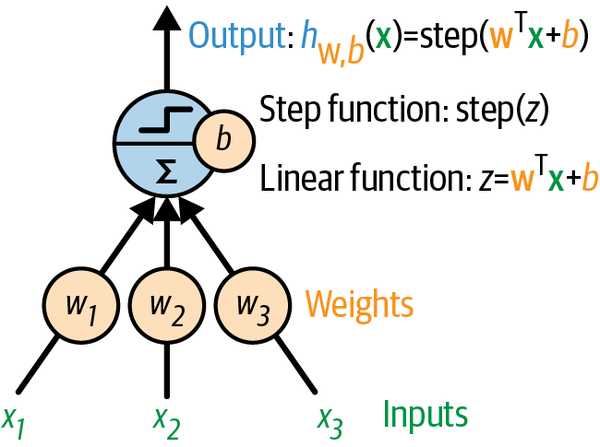

Common step functions:

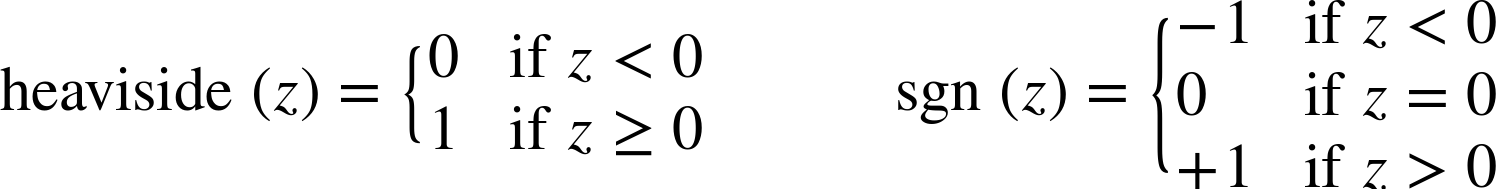

A single TLU can be used for simple linear binary classification. It computes a linear function of its inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. This may remind you of logistic regression or linear SVM classification. You could, for example, use a single TLU to classify iris flowers based on petal length and width. Training such a TLU would require finding the right values for w1, w2, and b.

A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer. For example, a perceptron with two inputs and three outputs is represented here:

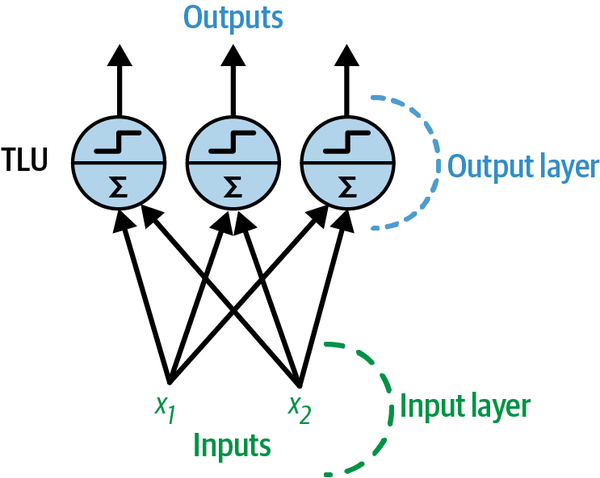

This perceptron can classify instances simultaneously into three different binary classes, which makes it a multilabel classifier. It may also be used for multiclass classification.

Compute the outputs of a layer of artificial neurons for several instances at once using the following equation. <br>
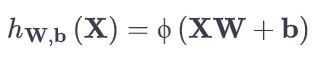

In this equation:

As always, X represents the matrix of input features. It has one row per instance and one column per feature.

The weight matrix W contains all the connection weights. It has one row per input and one column per neuron.

The bias vector b contains all the bias terms: one per neuron.

The function ϕ is called the activation function: when the artificial neurons are TLUs, it is a step function (we will discuss other activation functions shortly).

In mathematics, the sum of a matrix and a vector is undefined. However, in data science, we allow “broadcasting”: adding a vector to a matrix means adding it to every row in the matrix. So, XW + b first multiplies X by W—which results in a matrix with one row per instance and one column per output—then adds the vector b to every row of that matrix, which adds each bias term to the corresponding output, for every instance. Moreover, ϕ is then applied itemwise to each item in the resulting matrix.

So, how is a perceptron trained? The perceptron training algorithm proposed by Rosenblatt was largely inspired by Hebb’s rule. In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or Hebbian learning). Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the perceptron learning rule reinforces connections that help reduce the error. More specifically, the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. The rule is shown in <br>
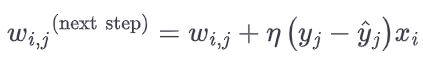

In this equation:

$w_{i, j}$ is the connection weight between the $i^{th}$ input and the jth neuron.

$x_i$ is the $i^{th}$ input value of the current training instance.

$\hat{y}$ is the output of the $j^{th}$ output neuron for the current training instance.

$y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.

η is the learning rate

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [ ]:
y_pred

array([ True, False])

Perceptron learning algorithm strongly resembles Stochastic Gradient Decent. In fact, Scikit_Learn *Perceptron* class is equivalent to using *SGDClassifier* with following hyperparameters: <br>


*   loss='perceptron'
*   learning_rate='constant'
*   eta0=1
*   penalty=None --> it means no reqularization

Unlike Logistic Regression classifier, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold.


In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the exclusive OR (XOR) classification problem). This is true of any other linear classification model (such as logistic regression classifiers), but researchers had expected much more from perceptrons, and some were so disappointed that they dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, and search. The lack of practical applications also didn’t help.

It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a multilayer perceptron (MLP). An MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the following image: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. Try verifying that this network indeed solves the XOR problem!

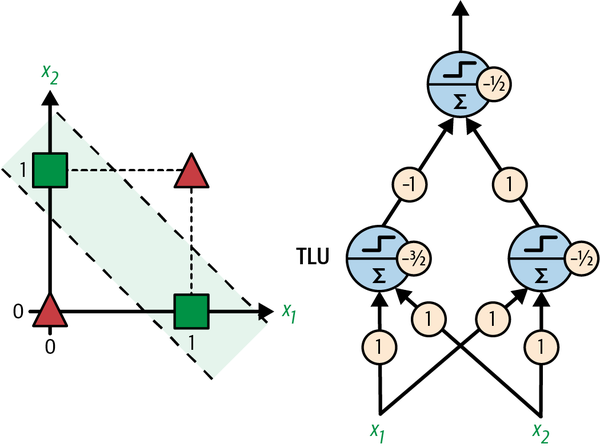

**The Multilayer Perceptron and Backpropagation**

An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.

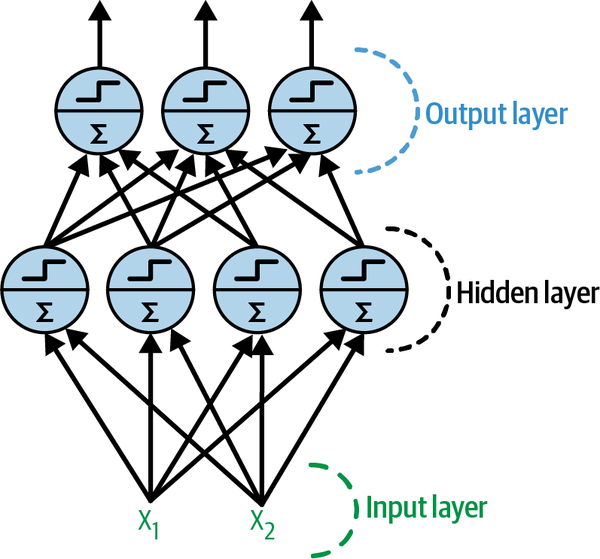

The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network (FNN).

When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations. Even so, many people talk about deep learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. In the early 1960s several researchers discussed the possibility of using gradient descent to train neural networks, but as we saw before, this requires computing the gradients of the model’s error with regard to the model parameters; it wasn’t clear at the time how to do this efficiently with such a complex model containing so many parameters, especially with the computers they had back then.

Then, in 1970, a researcher named Seppo Linnainmaa introduced in his master’s thesis a technique to compute all the gradients automatically and efficiently. This algorithm is now called reverse-mode automatic differentiation (or reverse-mode autodiff for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error. These gradients can then be used to perform a gradient descent step. If you repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network’s error will gradually drop until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient descent is now called backpropagation (or backprop for short).

Let’s run through how backpropagation works again in a bit more detail: <br>


*   It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

*   Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
*   Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).


*   Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.


*   The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
*   Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.




It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

In order for backprop to work properly, Rumelhart and his colleagues made a key change to the MLP’s architecture: they replaced the step function with the logistic function, σ(z) = 1 / (1 + exp(–z)), also called the sigmoid function. This was essential because the step function contains only flat segments, so there is no gradient to work with (gradient descent cannot move on a flat surface), while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the sigmoid function. Here are two other popular choices:

The hyperbolic tangent function: tanh(z) = 2σ(2z) – 1 <br>
Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

The rectified linear unit function: ReLU(z) = max(0, z) <br>
The ReLU function is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make gradient descent bounce around), and its derivative is 0 for z < 0. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default.⁠Importantly, the fact that it does not have a maximum output value helps reduce some issues during gradient descent .

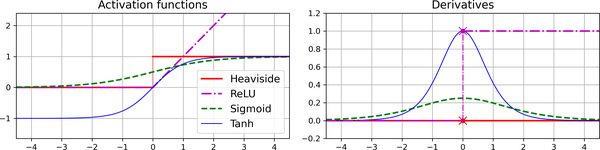

**Regression MLP**

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5053326657968684)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
pipeline = make_pipeline(StandardScaler(), lin_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.0463671065743185)

Note that this MLP does not use any activation function for the output layer, so it’s free to output any value it wants. This is generally fine, but if you want to guarantee that the output will always be positive, then you should use the ReLU activation function in the output layer, or the softplus activation function, which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)). Softplus is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will always fall within a given range of values, then you should use the sigmoid function or the hyperbolic tangent, and scale the targets to the appropriate range: 0 to 1 for sigmoid and –1 to 1 for tanh.

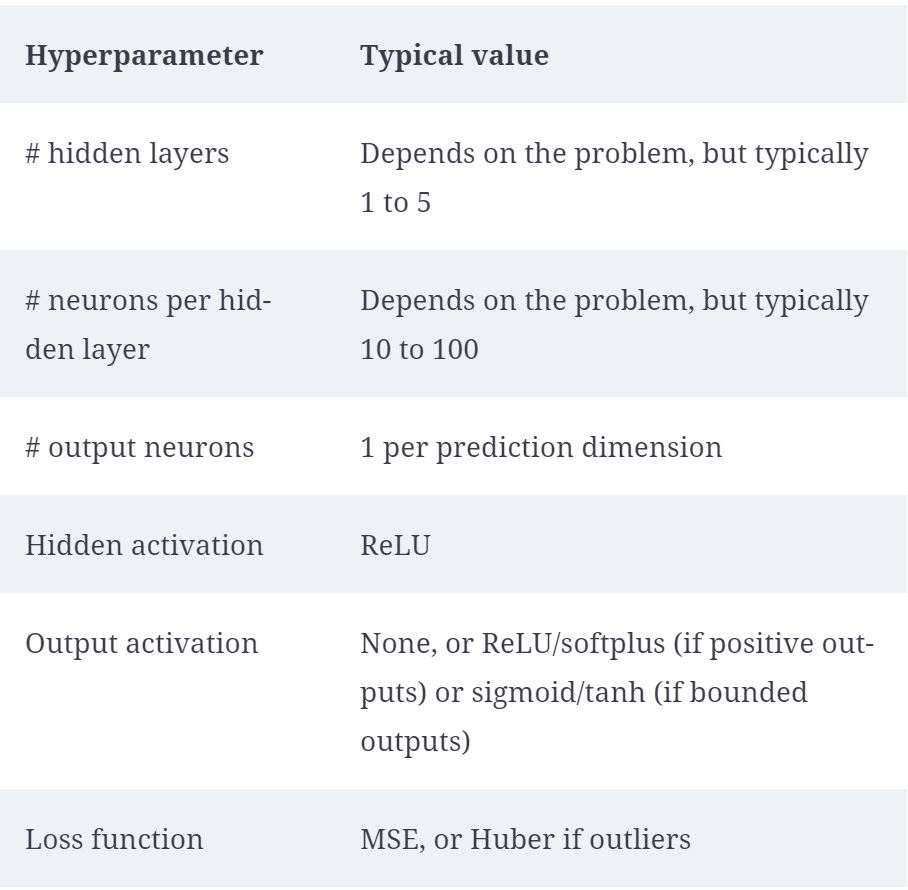

**Classification MLPs**

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the sigmoid activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive.

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (or x-entropy or log loss for short is generally a good choice.

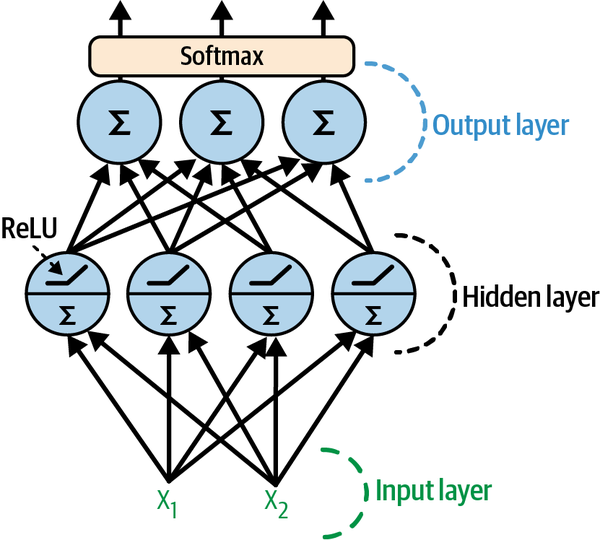

Scikit-Learn has an MLPClassifier class in the sklearn.neural_network package. It is almost identical to the MLPRegressor class, except that it minimizes the cross entropy rather than the MSE. Give it a try now, for example on the iris dataset. It’s almost a linear task, so a single layer with 5 to 10 neurons should suffice (make sure to scale the features).

In [4]:
# @title
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

Following table summarizes the typical architecture of a classification MLP.

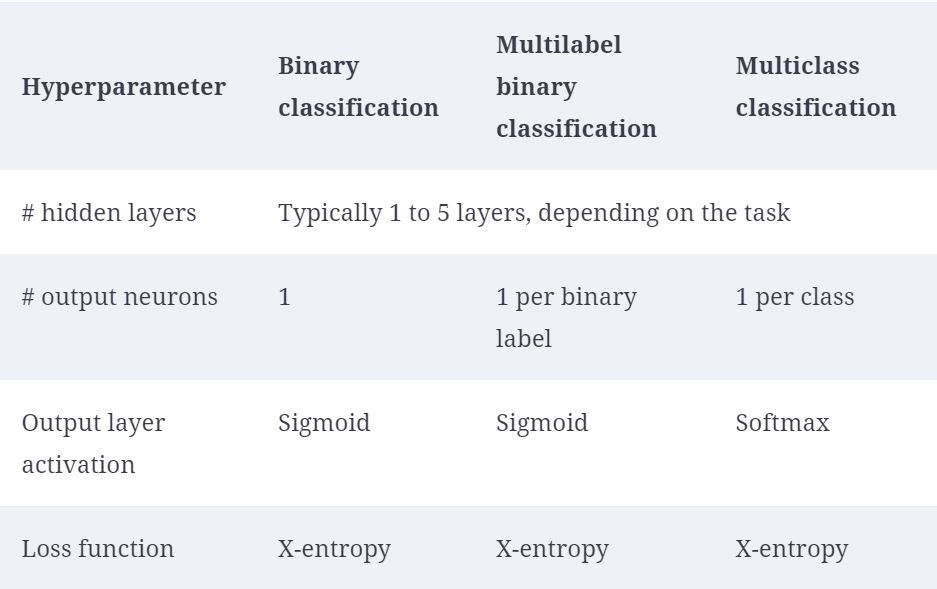

**Implementing MLPs with Keras**

Keras is TensorFlow’s high-level deep learning API: it allows you to build, train, evaluate, and execute all sorts of neural networks. The original Keras library was developed by François Chollet as part of a research project⁠ and was released as a standalone open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design.

In [5]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
# scale the data
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

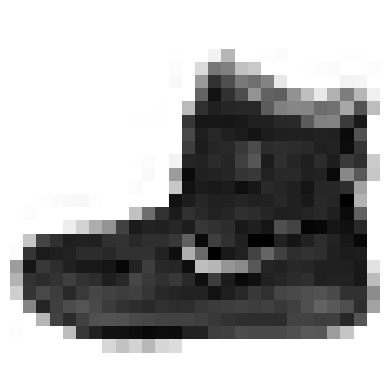

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Ankle boot'

In [14]:
y_train[0]

np.uint8(9)

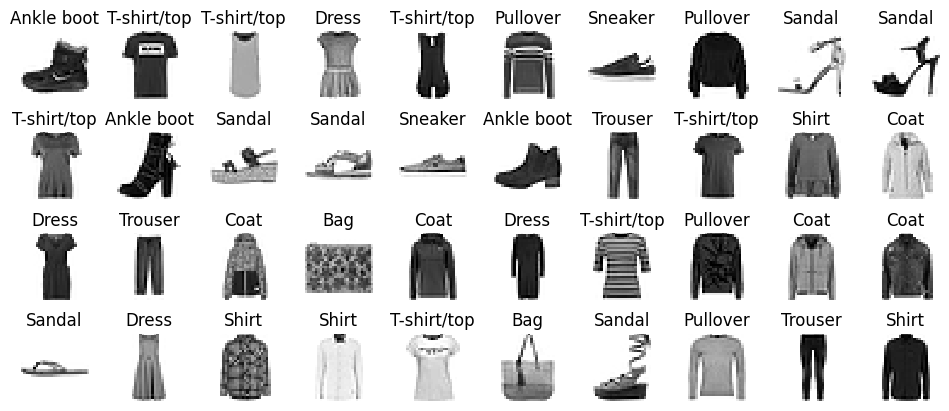

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [16]:
# Creating the model using the Sequential API
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Let’s go through this code line by line:


*   First, set TensorFlow’s random seed to make the results reproducible: the random weights of the hidden layers and the output layer will be the same every time you run the notebook. You could also choose to use the tf.keras.utils.set_random_seed() function, which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

*   The next line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the sequential API.

*   Next, we build the first layer (an Input layer) and add it to the model. We specify the input shape, which doesn’t include the batch size, only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.
*   Then we add a Flatten layer. Its role is to convert each input image into a 1D array: for example, if it receives a batch of shape [32, 28, 28], it will reshape it to [32, 784]. In other words, if it receives input data X, it computes X.reshape(-1, 784). This layer doesn’t have any parameters; it’s just there to do some simple preprocessing.


*   Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.


*   Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.


*   Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function because the classes are exclusive.






Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the Sequential model. You can also drop the Input layer and instead specify the input_shape in the first layer:

In [17]:
# clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The model’s summary() method displays all the model’s layers,⁠ including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters (you will see some non-trainable parameters later in this chapter):

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

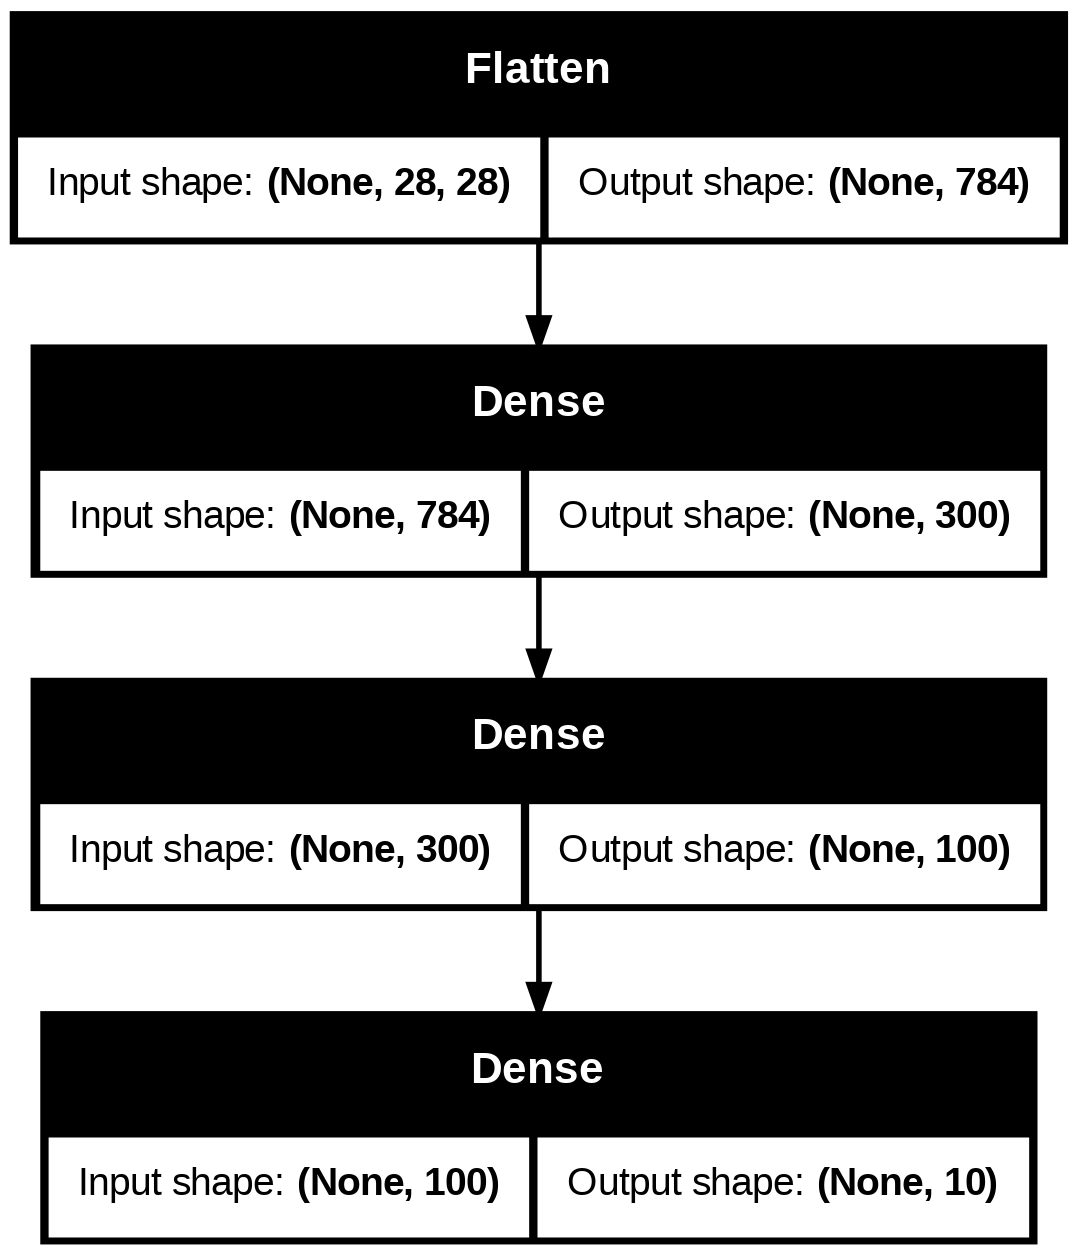

In [19]:
# another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

You can easily get a model’s list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [20]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and set_weights() methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0027168 , -0.00901473,  0.06344147, ..., -0.02118967,
         0.02016913, -0.0661074 ],
       [-0.06320076,  0.03908335,  0.04096843, ..., -0.00561644,
         0.04338464,  0.0451194 ],
       [-0.01697112, -0.02849228, -0.02773785, ...,  0.00210541,
         0.06864595,  0.02365224],
       ...,
       [ 0.02424005, -0.00206894, -0.03576836, ...,  0.02823572,
        -0.02460971, -0.03251611],
       [ 0.05406544,  0.06656884, -0.0424334 , ...,  0.05833071,
        -0.0052633 , -0.02975667],
       [-0.06021012, -0.06322663,  0.01575471, ..., -0.05847019,
        -0.02438288,  0.06449671]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

"sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the tf.keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1.

In [28]:
# shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
# shows how to convert one-hot vectors to class ids
import numpy as np
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

Regarding the optimizer, "sgd" means that we will train the model using stochastic gradient descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus gradient descent).

When using the SGD optimizer, it is important to tune the learning rate. So, you will generally want to use optimizer=tf.keras. ​opti⁠mizers.SGD(learning_rate=__???__) to set the learning rate, rather than optimizer="sgd", which defaults to a learning rate of 0.01.

In [30]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6837 - loss: 0.9964 - val_accuracy: 0.8258 - val_loss: 0.5031
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8278 - loss: 0.5008 - val_accuracy: 0.8354 - val_loss: 0.4542
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8446 - loss: 0.4487 - val_accuracy: 0.8430 - val_loss: 0.4322
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8549 - loss: 0.4189 - val_accuracy: 0.8492 - val_loss: 0.4177
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8617 - loss: 0.3974 - val_accuracy: 0.8520 - val_loss: 0.4091
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8665 - loss: 0.3808 - val_accuracy: 0.8550 - val_loss: 0.4004
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8711 - loss: 0.3670 - val_accuracy: 0.8570 - val_loss: 0.3919
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8744 - loss: 0.3550

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.

Shape errors are quite common, especially when getting started, so you should familiarize yourself with the error messages: try fitting a model with inputs and/or labels of the wrong shape, and see the errors you get. Similarly, try compiling the model with loss="categorical_crossentropy" instead of loss="sparse_​cat⁠egorical_crossentropy". Or you can remove the Flatten layer.

In [31]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get the learning curves.

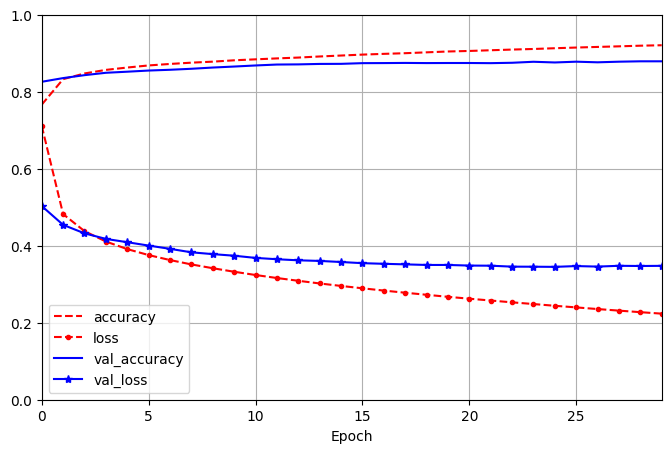

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. This is good. The validation curves are relatively close to each other at first, but they get further apart over time, which shows that there’s a little bit of overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training, but that’s not actually the case. The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

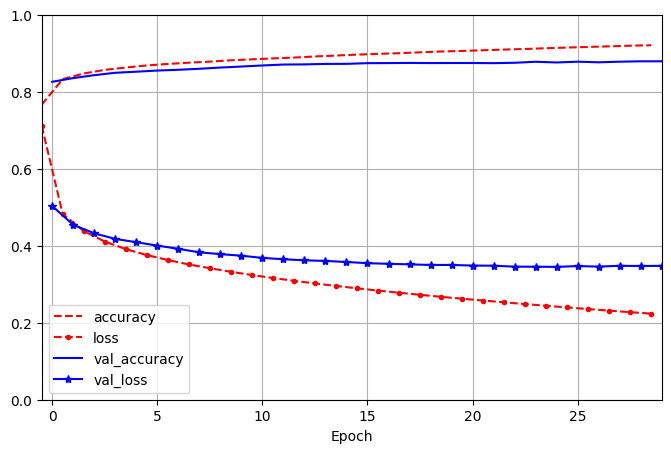

In [35]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. This is as simple as calling the fit() method again, since Keras just continues training where it left off: you should be able to reach about 89.8% validation accuracy, while the training accuracy will continue to rise up to 100% (this is not always the case).

In [ ]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2219 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.3352 - val_sparse_categorical_accuracy: 0.8796
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0.9216 - val_loss: 0.3248 - val_sparse_categorical_accuracy: 0.8792
Epoch 3/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2146 - sparse_categorical_accuracy: 0.9233 - val_loss: 0.3143 - val_sparse_categorical_accuracy: 0.8868
Epoch 4/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2126 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.3064 - val_sparse_categorical_accuracy: 0.8874
Epoch 5/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2085 - sparse_categorical_accuracy: 0.9248 - val_loss: 0.3104 - val_sparse_categorical_accuracy: 0.8860
Epoch 6/15
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2047 - spar

If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32). We will get back to hyperparameter tuning at the end of this chapter. Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evaluate() method (it also supports several other arguments, such as batch_size and sample_weight; please check the documentation for more details):

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3243 - sparse_categorical_accuracy: 0.8890


[0.3242628276348114, 0.8889999985694885]

Now let’s use the model’s predict() method to make predictions on new instances. Since we don’t have actual new instances, we’ll just use the first three instances of the test set:

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 168ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance the model estimates one probability per class, from class 0 to class 9. This is similar to the output of the predict_proba() method in Scikit-Learn classifiers. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 96%, the probability of class 7 (sneaker) is 2%, the probability of class 5 (sandal) is 1%, and the probabilities of the other classes are negligible. In other words, it is highly confident that the first image is footwear, most likely ankle boots but possibly sneakers or sandals. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the argmax() method to get the highest probability class index for each instance:

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

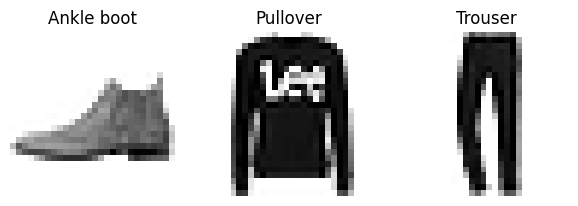

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()